In [1]:
"""代表的な離散型確率分布"""
#推測統計では限られた標本から母集団の平均や分散といった指標を推定することが目的である。しかし、母集団の確率分布の形状に何も置かないでそのような指標を推定することは簡単なものではない。このように母集団の確率分布に何の家庭も置かないことを「ノンパラメトリック」な手法という。
#パラメトリック：ノンパラメトリックと対象となるのがパラメトリックな手法である。これは、母集団はこういう性質のはずだからこんな形状を持った確率分布だろうとある程度仮定を置いて、後は確率分布の期待値や分散を決定する小数のパラメタのみを推測する方法である。

#ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [2]:
# グラフの線の種類
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), '負の確率があります'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'確率の和が{prob_sum}になりました'
    print(f'期待値は{E(X):.4}')
    print(f'分散は{(V(X)):.4}')

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])

    fig = plt.figure(figsize=(10, 6))

    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()

    plt.show()

In [3]:
#ベルヌーイ分布
#ベルヌーイ分布は、最も基本的な離散型確率分布で、取り得る値が0と1しかない確率分布である。ベルヌーイ分布に従う確率変数の試行のことをベルヌーイ試行といい、1が出ることを成功、0が出ることを失敗という。
#取り得る値が2つしかなく、確率の和が1という性質から、どちらかの確率が定まればもう一方の確率が自動的に定まる。そのためベルヌーイ分布では1が出る確率をp,0が出る確率を1-pとする。このpがベルヌーイ分布の形を調整できる唯一のパラメタで、確率の性質を満たすために0<p<1を満たす必要がある

#ベルヌーイ分布の期待値と分散
#ベルヌーイ分布をNumPyで実装してみる。パラメタを定めることにより確率分布が確定するので、パラメタpを引数にx_setとｆを返す関数で実装する。
    
def Bren(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [4]:
#Bern(0.3)に従う確率変数Xをつくってみる。
p = 0.3
X = Bren(p)

In [5]:
#期待値と分散を計算
check_prob(X)

期待値は0.3
分散は0.21


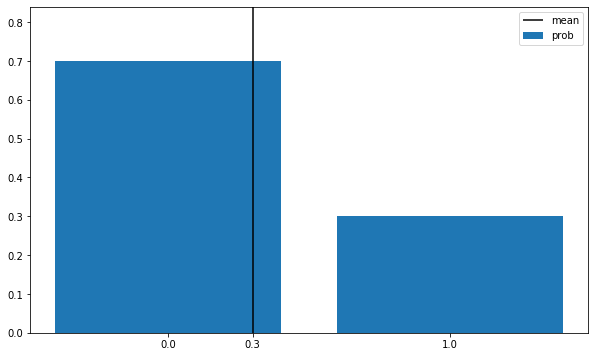

In [6]:
#確率変数Xを図示する。中央の縦線が確率変数Xの期待値を示している
plot_prob(X)

In [7]:
#scipy.statsを使った実装
#scipy.statsにはベルヌーイ分布にしたがy確率関数を造ることができるbernoulli関数がある。ベルヌーイ関数は引数にパラメタpをとり、返り値としてbern(p)に従うrv_frozen objectを返す。
#rv_frozen objectはscipy.statusにおける確率変数に相当するもので、様々なメソッドを持っている。
rv = stats.bernoulli(p)

In [8]:
#rvのpmfメソッドは確率関数を計算できる。0と1をそれぞれ渡すと、その値を取る確率が返ってくる。
rv.pmf(0), rv.pmf(1)

(0.7000000000000001, 0.3)

In [9]:
#pmfメソッドは引数リストを渡すこともできる。この場合、リストの各要素に対する確率を格納したNumpyのarrayが返ってくる。
rv.pmf([0,1])

array([0.7, 0.3])

In [10]:
#cdfメソッドを使うことで累積密度関数を計算できる。こちらも引数にリストを渡すことができる。
rv.cdf([0,1])

array([0.7, 1. ])

In [11]:
#meanメソッドやvarメソッドを呼び出すことで期待値や分散を計算できる
rv.mean(), rv.var()

(0.3, 0.21)

In [12]:
"""二項分布"""
#二項分布は成功確率がpのベルヌーイ試行をn回行ったときの成功回数が従う分布である。成功する回数は0回からn回まであるので、取り得る値は{0,1,…,n}である。
#二項分布のパラメタには成功確率のpと試行回数のnの2つがあり、pは0<p<1で、んは1以上の整数である必要がある。パラメタがn,pの二項分布をBin(n,p)と表記する。
#Bin(n,p) => 二項分布の確率関数 => https://ja.wikipedia.org/wiki/%E4%BA%8C%E9%A0%85%E5%88%86%E5%B8%83

#二項分布の具体例
#10回コインを投げて表が出る回数
#これはp=1/2のベルヌーイ試行を10回行ったときの成功回数と考える事ができるのでBin(10, 1/2)に従う。このことからコインを10回投げて表が3回出る確率は、P(x=3) = 15/128 となる。
#4回サイコロを投げて6が出る回数
#これはp=1/6のベルヌーイ試行を4回行ったときの成功回数と考える事ができるので、Bin(4, 1/6)に従う。このことから4回サイコロを投げて6が1回も出ない確率であれば、　p(x=0) = 625/1296 となる。

#二項分布の期待値と分散
#X ~ Bin(n, p)とするとき、 期待値：E(X)= np,　分散V(X) = np(1-p)

#二項分布をNumpyで実装してみる。コンビネーションnCxの計算には、scipy.specialにあるcomb関数を用いる。
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [13]:
#Bin(10, 0.3)に従う確率変数Xを作ってみる。
n = 10
p = 0.3
X = Bin(n, p)

In [14]:
#期待値は10*0.3 = 3 分散は10*0.3*0.7 = 2.1となる
check_prob(X)

期待値は3.0
分散は2.1


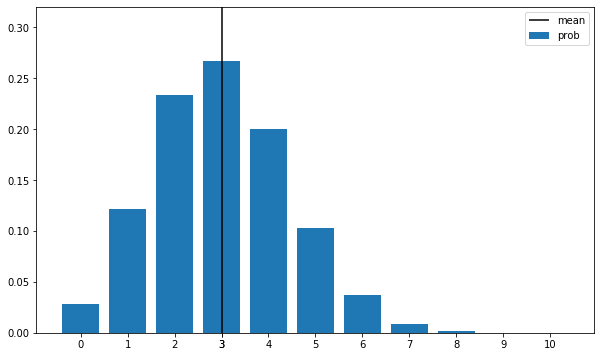

In [15]:
#図示する。二項分布は期待値でピークをとる山形の分布となる。
plot_prob(X)

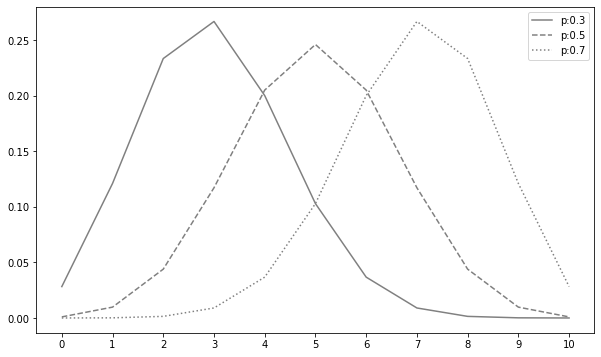

In [18]:
#scipy.statsでは二項分布の確率変数はbinom関数によって作ることができる。nを10に固定して、pを0.3,0.5,0,7させて二項分布がどのような形になるか見てみる。
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()
plt.show()